# What is the best opening move?

In [ ]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load dataset
df = pd.read_csv('tic_tac_toe_data.csv')
df.head()

,Winner,Move 1-X (Row-Col),Move 2-O (Row-Col),Move 3-X (Row-Col),Move 4-O (Row-Col),Move 5-X (Row-Col),Move 6-O (Row-Col),Move 7-X (Row-Col),Move 8-O (Row-Col),Move 9-X (Row-Col)
0,X,0-0,0-1,1-0,0-2,2-0,---,---,---,---
1,X,0-0,0-1,1-0,1-1,2-0,---,---,---,---
2,X,0-0,0-1,1-0,1-2,2-0,---,---,---,---
3,X,0-0,0-1,1-0,2-1,2-0,---,---,---,---
4,X,0-0,0-1,1-0,2-2,2-0,---,---,---,---


In [ ]:
# remove '(Row-Col)' from columns that contain it
df.columns = [col.replace(' (Row-Col)', '') if ' (Row-Col)' in col else col for col in df.columns]
df.head()

,Winner,Move 1-X,Move 2-O,Move 3-X,Move 4-O,Move 5-X,Move 6-O,Move 7-X,Move 8-O,Move 9-X
0,X,0-0,0-1,1-0,0-2,2-0,---,---,---,---
1,X,0-0,0-1,1-0,1-1,2-0,---,---,---,---
2,X,0-0,0-1,1-0,1-2,2-0,---,---,---,---
3,X,0-0,0-1,1-0,2-1,2-0,---,---,---,---
4,X,0-0,0-1,1-0,2-2,2-0,---,---,---,---


In [ ]:
# filter to only games that X won
x_wins = df[df['Winner'] == 'X']

print(f"Total games where X won: {len(x_wins):,} out of {len(df):,} total games.")
print(f"Percentage of games won by X: {len(x_wins) / len(df) * 100:.2f}%")

Total games where X won: 131,184 out of 255,168 total games.
Percentage of games won by X: 51.41%


In [ ]:
# extract the first move by Player X -- the format is like "1-0" → split into row and col
x_wins[['row', 'col']] = x_wins['Move 1-X'].str.split('-', expand=True).astype(int)

C:\Users\sarah\AppData\Local\Temp\ipykernel_40316\2405919286.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_wins[['row', 'col']] = x_wins['Move 1-X'].str.split('-', expand=True).astype(int)
C:\Users\sarah\AppData\Local\Temp\ipykernel_40316\2405919286.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_wins[['row', 'col']] = x_wins['Move 1-X'].str.split('-', expand=True).astype(int)


In [ ]:
# create dataframe showing how many times Player X won when opening at each position on the board
heatmap_data = x_wins.groupby(['row', 'col']).size().unstack(fill_value=0)
heatmap_data

col,0,1,2
row,,,
0,14652,14232,14652
1,14232,15648,14232
2,14652,14232,14652


In [ ]:
# get total counts for all opening moves (not just X wins)
total_openings = df['Move 1-X'].str.split('-', expand=True).astype(int)

# analyze total occurrences of each opening move, regardless of outcome
df[['row', 'col']] = total_openings

# groups all games by the first move coordinates
total_counts = df.groupby(['row', 'col']).size().unstack(fill_value=0)

In [19]:
# calculate win rate heatmap
win_rate_heatmap = heatmap_data / total_counts

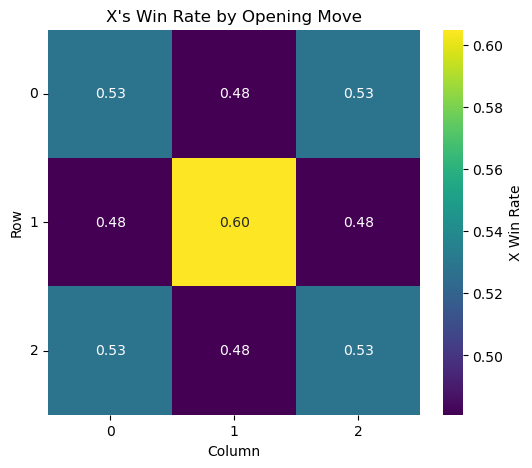

In [20]:
# plot the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(win_rate_heatmap, annot=True, cmap='viridis', fmt='.2f', cbar_kws={'label': 'X Win Rate'})
plt.title("X's Win Rate by Opening Move")
plt.xlabel('Column')
plt.ylabel('Row')
plt.xticks([0.5,1.5,2.5], ['0', '1', '2'])
plt.yticks([0.5,1.5,2.5], ['0', '1', '2'], rotation=0)
plt.show()